In [1]:
import os
os.chdir('../py')

import pandas as pd
import numpy as np

import EDA
import utils

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = False
plt.rcParams['font.family'] = 'Ricty Diminised'
sns.set(style="whitegrid", font='Ricty Diminised', palette="muted", color_codes=True, rc={'grid.linestyle': '--'})
red = sns.xkcd_rgb["light red"]
green = sns.xkcd_rgb["medium green"]
blue = sns.xkcd_rgb["denim blue"]

import feather

In [5]:
DIR = '../input/feather/'

train = feather.read_dataframe(DIR + 'train.ftr')
test  = feather.read_dataframe(DIR + 'test.ftr')

In [14]:
train.groupby('card1')['TransactionAmt']

In [15]:
train.groupby('card1').agg({'TransactionAmt': 'mean'})

,TransactionAmt
card1,
1000,23.443001
1001,79.666664
1004,136.399994
1005,50.000000
1006,133.333328
1007,39.183502
1008,60.816666
1009,130.000000
1010,277.932007


In [13]:
train.groupby(['card1'])['TransactionAmt'].transform('mean')

0         351.931152
1         234.292755
2          97.015541
3         123.416336
4          96.972221
5         134.071426
6         101.880096
7         141.144638
8         142.683411
9         122.020493
10         58.848999
11         39.989204
12         87.765923
13        109.526802
14        129.685684
15         66.762001
16         52.392105
17        169.590561
18         97.015541
19        108.004623
20        166.184540
21        105.943893
22        191.385696
23         92.869774
24        107.810585
25        109.483391
26        158.535950
27         58.462502
28        117.431992
29        122.762352
             ...    
590510    115.698120
590511     86.170998
590512    229.692947
590513     69.956665
590514    231.493683
590515     74.566216
590516    129.632050
590517    229.692947
590518     86.694321
590519    112.421875
590520    115.172531
590521     54.390480
590522     86.535782
590523    134.119644
590524    122.763626
590525    164.631805
590526    204

In [12]:
train.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,...,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,...,None,NaN,None,None,None,None,None,None,None,None
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,...,None,NaN,None,None,None,None,None,None,None,None
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,...,None,NaN,None,None,None,None,None,None,None,None
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,...,None,NaN,None,None,None,None,None,None,None,None
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,...,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M


In [7]:
train['TransactionAmt'].sort_values(ascending=False)

274339    31937.390625
274336    31937.390625
296021     6450.970215
248413     6085.229980
384603     5543.229980
275529     5420.000000
275535     5420.000000
584767     5366.819824
462514     5279.950195
315172     5279.950195
303106     5279.950195
171451     5278.950195
575569     5277.950195
409855     5191.000000
422708     5191.000000
119566     5094.950195
423729     5047.470215
584835     5001.819824
249993     4989.970215
335107     4976.310059
575020     4879.950195
225523     4843.750000
226454     4843.750000
335251     4836.330078
42506      4829.950195
266065     4817.580078
266053     4817.470215
525456     4652.919922
437296     4633.339844
418838     4631.000000
              ...     
542730        0.588000
171176        0.583000
169046        0.583000
169847        0.583000
170545        0.583000
169055        0.583000
309509        0.570000
361693        0.543000
548148        0.499000
307933        0.498000
20640         0.484000
42215         0.467000
47265      

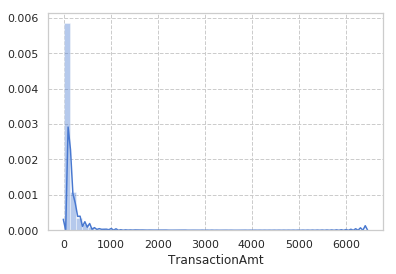

In [8]:
sns.distplot(train[train['TransactionAmt'] < 30000]['TransactionAmt'])

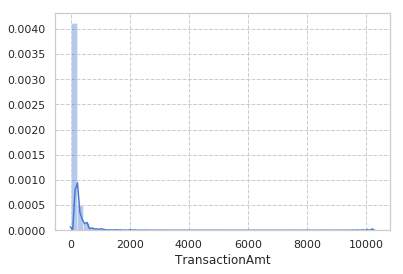

In [9]:
sns.distplot(test['TransactionAmt'])

In [11]:
test['TransactionAmt'].sort_values(ascending=False)

243076    10270.000000
241064     9801.500000
241816     9601.500000
241075     9333.000000
278061     9333.000000
67847      9154.459961
67842      9154.459961
241823     8814.500000
500634     7926.419922
500741     7926.419922
504        7777.490234
126853     6759.000000
291695     6609.950195
172397     6532.950195
291873     6279.950195
364859     6222.000000
74576      6197.359863
74579      6197.359863
291756     6079.950195
292127     5979.950195
65869      5976.799805
171881     5858.160156
57216      5605.459961
380223     5487.359863
26776      5279.950195
319033     5279.950195
319031     5279.950195
365241     5279.950195
127605     5279.950195
26784      5279.950195
              ...     
208622        0.852000
335082        0.849000
91742         0.755000
87036         0.748000
259653        0.639000
259647        0.639000
259650        0.639000
259659        0.639000
259655        0.639000
255001        0.637000
452388        0.615000
271225        0.615000
452381     